<a href="https://colab.research.google.com/github/MMAMAR/stage-/blob/master/SSHfromSST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install netCDF4
import netCDF4
import numpy as np

from datetime import datetime,date
import matplotlib.pyplot as plt 
import os

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir('/content/drive/My Drive')
import lap_diffusionMask
from scipy import interpolate
import azimuthalAverage
import scipy.fftpack as fftpack

In [0]:
def compute_RaPSD(I,res):

    W = np.reshape(np.hanning(I.shape[0]),(I.shape[0],1)) * np.reshape(np.hanning(I.shape[1]),(I.shape[1],1)).transpose() 

    F1 = fftpack.fft2( W * I) 
    F2 = fftpack.fftshift( F1 ) 
    psd2D = np.abs( F2 )**2
    freq,psd1D = azimuthalAverage.azimuthalAverage(psd2D, returnradii=True,binsize=2)
    #rval,psd1D = radialProfile.azimuthalAverage(psd2D)

    ## normalized frequencies
    freq = freq / np.max(I.shape)

    return freq / res ,psd1D


In [0]:
#os.chdir('/Users/rfablet/Research/Data')
## test for filtering
filename = '/content/drive/My Drive/CMEMSData/global-analysis-forecast-phy-001-024-201901.nc'

## field info
SSHfieldname     = 'zos'
SSTfieldname     = 'thetao'
Latfieldname    = 'latitude'
Lonfieldname    = 'longitude'
Timefieldname   = 'time'

        
print('..... Open monthly file: '+filename)
nc_fid = netCDF4.Dataset(filename,'r')

Lats=nc_fid[Latfieldname]
Lons=nc_fid[Lonfieldname]
sstfield = nc_fid['zos'][:,:,:]
sstfield=sstfield[0]
sstfield=sstfield.reshape(241,601)
Lats=Lats[0:100]
Lons=Lons[0:100]
print(Lats)


..... Open monthly file: /content/drive/My Drive/CMEMSData/global-analysis-forecast-phy-001-024-201901.nc
[-50.       -49.916668 -49.833332 -49.75     -49.666668 -49.583332
 -49.5      -49.416668 -49.333332 -49.25     -49.166668 -49.083332
 -49.       -48.916668 -48.833332 -48.75     -48.666668 -48.583332
 -48.5      -48.416668 -48.333332 -48.25     -48.166668 -48.083332
 -48.       -47.916668 -47.833332 -47.75     -47.666668 -47.583332
 -47.5      -47.416668 -47.333332 -47.25     -47.166668 -47.083332
 -47.       -46.916668 -46.833332 -46.75     -46.666668 -46.583332
 -46.5      -46.416668 -46.333332 -46.25     -46.166668 -46.083332
 -46.       -45.916668 -45.833332 -45.75     -45.666668 -45.583332
 -45.5      -45.416668 -45.333332 -45.25     -45.166668 -45.083332
 -45.       -44.916668 -44.833332 -44.75     -44.666668 -44.583332
 -44.5      -44.416668 -44.333332 -44.25     -44.166668 -44.083332
 -44.       -43.916668 -43.833332 -43.75     -43.666668 -43.583332
 -43.5      -43.416668 

In [0]:
from sklearn.feature_extraction import image
X_patches=image.extract_patches_2d(sstfield, (100, 100), max_patches= 100, random_state=0)
Mask_patches=image.extract_patches_2d(sstfield.mask, (100, 100), max_patches= 100, random_state=0)

x_train=[]
maskes=[]

for i in range(len(X_patches)):
  if np.sum(Mask_patches[i]==True)==0:
    x_train.append(X_patches[i])
    maskes.append(Mask_patches[i])

plt.figure()
plt.imshow(x_train[8])
plt.show()

sstfield=x_train[8]

AttributeError: ignored

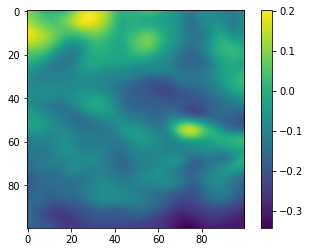

....... Filtering fine-scale for regridding


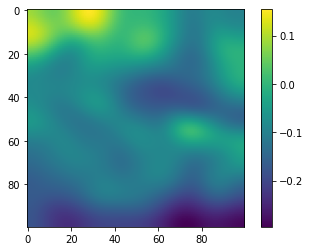

In [0]:
plt.figure(1)
imgplot=plt.imshow(np.flipud(sstfield))

plt.colorbar()
plt.show()



print("....... Filtering fine-scale for regridding")
LamScale   = 0.1

IterScale  = 400
if IterScale > 0:
    sstFilt_HR = lap_diffusionMask.lap_diffusionMask(sstfield,IterScale,LamScale)
else:
    sstFilt_HR = sstfield.copy()



plt.figure(2)
imgplot=plt.imshow(np.flipud(sstFilt_HR))
plt.colorbar()
plt.show()




psd1Doriginal=  [1.39035190e+04 6.41281915e+02 1.18625672e+02 2.36121920e+01
 4.61728152e+00 6.99745811e-01 1.68735419e-01 6.60280912e-02
 2.23642319e-02 7.25432464e-03 3.34894167e-03 1.62802744e-03
 1.70352146e-03 1.62674636e-03 5.26502298e-04 3.60042250e-04
 6.09472283e-04 7.83473717e-04 3.83420220e-04 1.55271392e-04
 4.82665445e-05 4.01248476e-05 3.84841034e-05 3.16176830e-05
 2.05381580e-05 1.10633739e-05 1.13050966e-05 8.35441135e-06
 1.19936465e-05 1.22821960e-05 1.15613706e-05 9.62689290e-06
 1.23322549e-05 9.35969195e-06 6.07654074e-06 7.37658411e-07]
psd1DFilt=  [1.35205160e+04 4.13987984e+02 2.63715133e+01 1.40738606e+00
 3.28408592e-02 8.83181067e-04 1.12190420e-04 3.57877793e-05
 1.52636847e-05 6.50158520e-06 3.24008766e-06 1.76210080e-06
 8.94270704e-07 5.19246938e-07 3.17366235e-07 1.81922369e-07
 1.14838770e-07 7.33794877e-08 4.07757189e-08 2.63870246e-08
 1.46040782e-08 7.75611771e-09 3.57785110e-09 1.30719545e-09
 1.81435504e-10 0.00000000e+00 0.00000000e+00 0.00000000

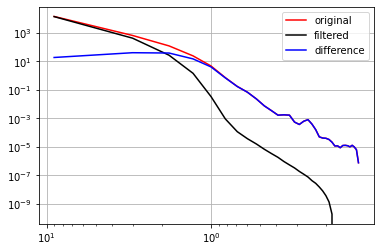

In [0]:
f,psd1Doriginal=compute_RaPSD(sstfield,0.09)
f,psd1DFilt=compute_RaPSD(sstFilt_HR,0.09)
f,psd1Ddiff=compute_RaPSD(sstFilt_HR-sstfield,0.09)

period=1. /f


ax = plt.subplot(1,1,1)                    
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
ax.plot(period,psd1Doriginal,'r-', label='original')
ax.invert_xaxis()
#ax.hold()
ax.plot(period,psd1DFilt,'k-', label= 'filtered')

ax.plot(period,psd1Ddiff,'b-', label= 'difference')
ax.grid()
ax.legend()

print("psd1Doriginal= ", psd1Doriginal)
print("psd1DFilt= ", psd1DFilt)
print("psd1Ddiff= ",psd1Ddiff)
print("period= ", period)


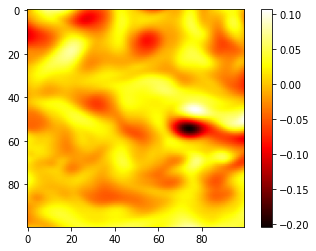

In [0]:


def GetFilteredData(I,IterScale,LamScale):
  #....... Filtering fine-scale for regridding

  if IterScale > 0:
    sstFilt_HR = lap_diffusionMask.lap_diffusionMask(I,IterScale,LamScale)
  else:
    sstFilt_HR = I.copy()


  return sstFilt_HR



sstFiltered=GetFilteredData(sstfield,500,0.2)
plt.figure()
imgplot=plt.imshow(np.flipud(sstFiltered-sstfield))
imgplot.set_cmap('hot')
plt.colorbar()
plt.show()


## Preprocessing 

In [0]:
!pip install netcdf4

In [0]:
import os
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.feature_extraction import image
from netCDF4 import Dataset
import numpy.ma as ma

In [0]:
os.chdir('/content/drive/My Drive/')
!pwd
!ls /content/drive/My\ Drive/CMEMSData

/content/drive/My Drive
global-analysis-forecast-phy-001-024-201810.nc
global-analysis-forecast-phy-001-024-201811.nc
global-analysis-forecast-phy-001-024-201812.nc
global-analysis-forecast-phy-001-024-201901.nc
global-analysis-forecast-phy-001-024-201902.nc
global-analysis-forecast-phy-001-024-201903.nc
global-analysis-forecast-phy-001-024-201904.nc


In [0]:
X_train=[]
Y_train=[]
X_test=[]
Y_test=[]
Maskes=[]
train_files=['global-analysis-forecast-phy-001-024-201812.nc','global-analysis-forecast-phy-001-024-201902.nc']
test_files=['global-analysis-forecast-phy-001-024-201901.nc']

# trainning data

for f in train_files:
  nc_data     = Dataset('./CMEMSData/'+f,'r')
  ssh = nc_data['zos'][:,:,:]
  sst = nc_data['thetao'][:,0,:,:]
  for i in range(len(sst)):
    X=np.flipud(sst[i,:,:]).data
    Y=np.flipud(ssh[i,:,:]).data
    XY_mask=np.flipud(ssh[i,:,:]).mask
    X_patches=image.extract_patches_2d(X, (50, 50), max_patches= 300, random_state=0)
    Y_patches=image.extract_patches_2d(Y, (50, 50), max_patches= 300, random_state=0)
    Mask_patches=image.extract_patches_2d(XY_mask, (50, 50), max_patches= 300, random_state=0)

    for j in range(len(X_patches)):
      X_train.append(X_patches[j])
      Y_train.append(Y_patches[j])
      Maskes.append(Mask_patches[j])

x_train=[]
y_train=[]

for i in range(len(X_train)):
  if np.sum(Maskes[i]==True)==0:
    x_train.append(X_train[i])
    y_train.append(Y_train[i])

print(len(x_train))
print(len(y_train))

#test data

Maskes=[]
for f in test_files:
  nc_data     = Dataset('./CMEMSData/'+f,'r')
  ssh = nc_data['zos'][:,:,:]
  sst = nc_data['thetao'][:,0,:,:]
  for i in range(len(sst)):
    X=np.flipud(sst[i,:,:]).data
    Y=np.flipud(ssh[i,:,:]).data
    XY_mask=np.flipud(ssh[i,:,:]).mask
    X_patches=image.extract_patches_2d(X, (50, 50), max_patches= 300, random_state=0)
    Y_patches=image.extract_patches_2d(Y, (50, 50), max_patches= 300, random_state=0)
    Mask_patches=image.extract_patches_2d(XY_mask, (50, 50), max_patches= 300, random_state=0)

    for j in range(len(X_patches)):
      X_test.append(X_patches[j])
      Y_test.append(Y_patches[j])
      Maskes.append(Mask_patches[j])

x_test=[]
y_test=[]

for i in range(len(X_test)):
  if np.sum(Maskes[i]==True)==0:
    x_test.append(X_test[i])
    y_test.append(Y_test[i])

print(len(x_test))
print(len(y_test))
X=[x_train,x_test]
Y=[y_train,y_test]

Mx1=np.array([np.mean(x) for x in x_train]).mean()
My1=np.array([np.mean(y) for y in y_train]).mean()
Mx2=np.array([np.mean(x) for x in x_test]).mean()
My2=np.array([np.mean(y) for y in y_test]).mean()


print(Mx1)
print(My1)
print(Mx2)
print(My2)

#Moyenne non spacialisée

x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

x_train=x_train-Mx1
y_train=y_train-My1
x_test=x_test-Mx2
y_test=y_test-My2


x_train,y_train=shuffle(x_train,y_train, random_state=0)
x_test,y_test=shuffle(x_test,y_test, random_state=0)


15458
15458
8122
8122
15.555562183442643
0.013675999625305578
15.693174144319459
0.029694990443557914


In [0]:
del X_patches, Y_patches, Mask_patches

In [0]:
X_train=[]
Y_train=[]
X_test=[]
Y_test=[]

for i in range(len(x_train)):
  X_train.append(x_train[i]-GetFilteredData(x_train[i],100,0.2))
  Y_train.append(y_train[i]-GetFilteredData(y_train[i],100,0.2))
print("...............done")

del x_train, y_train

for i in range(len(x_test)):
  X_test.append(x_test[i]-GetFilteredData(x_test[i],100,0.2))
  Y_test.append(y_test[i]-GetFilteredData(y_test[i],100,0.2))
  
print("...............done")
del x_test, y_test

X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)

...............done
...............done


In [0]:
print((X_train).shape)
print((Y_train).shape)
print((X_test).shape)
print((Y_test).shape)


(15458, 50, 50)
(15458, 50, 50)
(8122, 50, 50)
(8122, 50, 50)


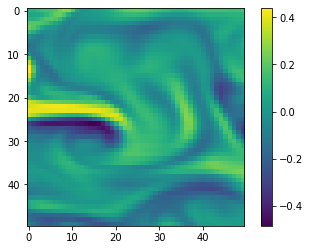

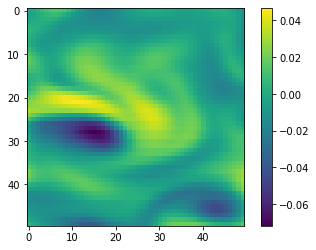

In [0]:
j=13
plt.figure()
imgplot=plt.imshow(X_train[j])
plt.colorbar()
plt.show()

imgplot=plt.imshow(Y_train[j])
plt.colorbar()
plt.show()

In [0]:
X_train=torch.Tensor(X_train)
Y_train=torch.Tensor(Y_train)
X_test=torch.Tensor(X_test)
Y_test=torch.Tensor(Y_test)

X_train=X_train/X_train.max()
Y_train=Y_train/Y_train.max()
X_test=X_test/X_test.max()
Y_test=Y_test/Y_test.max()

## Building a Model

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3,padding= (1,1))
        self.conv2 = nn.Conv2d(32, 32, 3,padding= (1,1))
        self.conv3 = nn.Conv2d(32, 1, 3,padding= (1,1))
        
    def forward(self, x):
      x=F.relu(self.conv1(x))
      x=F.relu(self.conv2(x))
      x=self.conv3(x)

      return(x)
net= Net()

In [0]:
lossfunction=nn.MSELoss()
optimizer=optim.Adam(net.parameters(), lr=0.00001)

In [0]:
epochs= 20
batch_size= 100

for i in range(epochs):
  #running_loss=0 
  
  for j in range(0,len(X_train), batch_size):
    X = X_train[j:j+batch_size].view(-1, 1, 50, 50)
    Y = Y_train[j:j+batch_size].view(-1, 1, 50, 50)
    optimizer.zero_grad()
    outputs = net(X)
    loss = lossfunction(outputs, Y)
    loss.backward()
    optimizer.step()
    #running_loss+=loss.item()

    if j==8000:
      print("epoch=",i,"; running_loss=", loss.item())

epoch= 0 ; running_loss= 0.0027644075453281403
epoch= 1 ; running_loss= 0.0024827937595546246
epoch= 2 ; running_loss= 0.0023074611090123653
epoch= 3 ; running_loss= 0.002238259185105562
epoch= 4 ; running_loss= 0.0022226031869649887
epoch= 5 ; running_loss= 0.0022144278045743704
epoch= 6 ; running_loss= 0.0022070794366300106
epoch= 7 ; running_loss= 0.002198843751102686
epoch= 8 ; running_loss= 0.0021911896765232086
epoch= 9 ; running_loss= 0.002182255033403635
epoch= 10 ; running_loss= 0.002174932276830077
epoch= 11 ; running_loss= 0.0021672830916941166
epoch= 12 ; running_loss= 0.0021604662761092186
epoch= 13 ; running_loss= 0.002153772860765457
epoch= 14 ; running_loss= 0.002146912971511483
epoch= 15 ; running_loss= 0.002140641678124666
epoch= 16 ; running_loss= 0.0021342646796256304
epoch= 17 ; running_loss= 0.002127832965925336
epoch= 18 ; running_loss= 0.0021213942673057318
epoch= 19 ; running_loss= 0.002115044742822647


In [0]:
outputs=net.forward(X_test.view(-1, 1, 50, 50)[0:3000])

In [0]:
outputs=outputs.view(-1,50,50)

MSE normalisée=  tensor(0.0043)
correlation=  0.5303846562846051


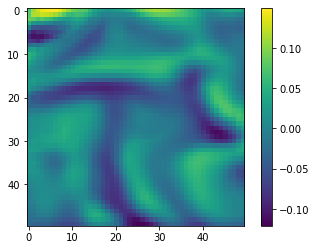

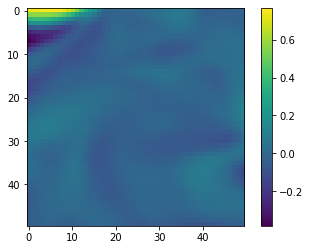

MSE normalisée=  tensor(0.0073)
correlation=  0.593646870897955


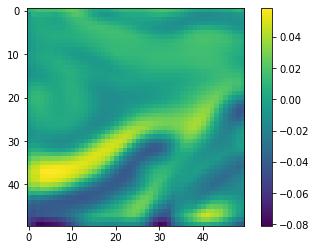

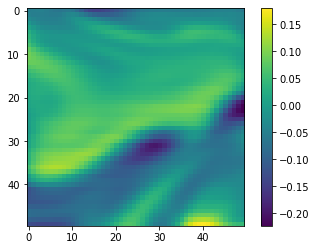

MSE normalisée=  tensor(0.0057)
correlation=  0.3206598811587002


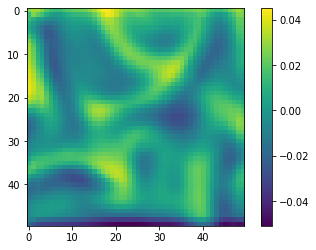

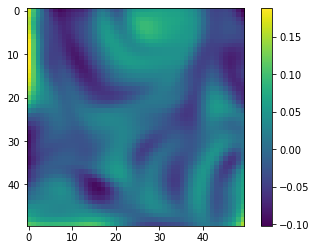

MSE normalisée=  tensor(0.0034)
correlation=  0.6899222470432083


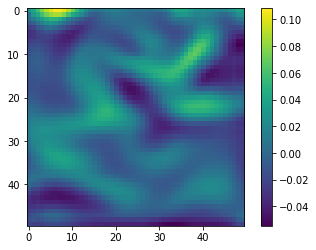

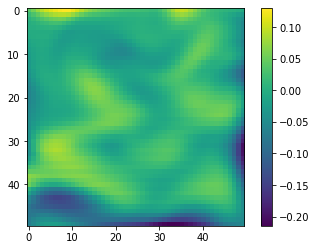

MSE normalisée=  tensor(0.0016)
correlation=  0.7923031802502934


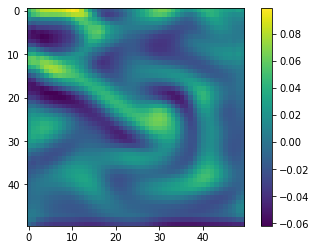

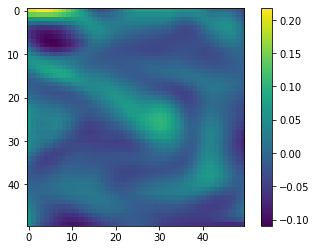

MSE normalisée=  tensor(0.0136)
correlation=  0.7122869421232211


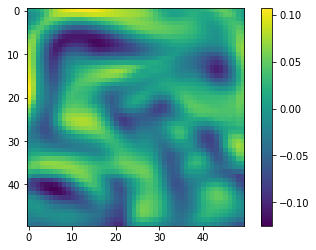

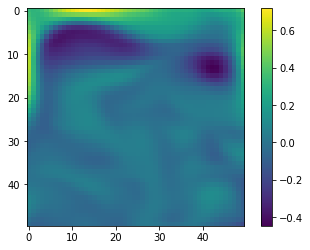

MSE normalisée=  tensor(0.0034)
correlation=  0.2599695350236321


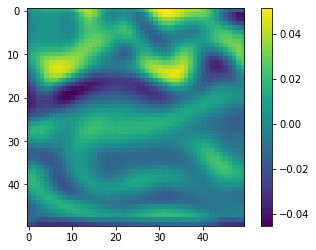

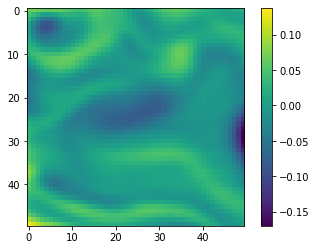

MSE normalisée=  tensor(0.0083)
correlation=  0.2636121310173609


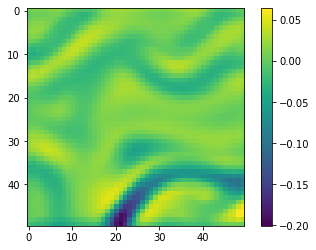

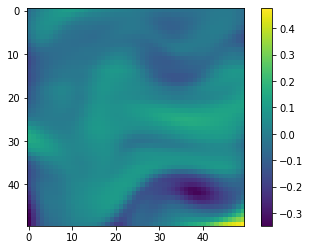

MSE normalisée=  tensor(0.0216)
correlation=  0.26545822807129554


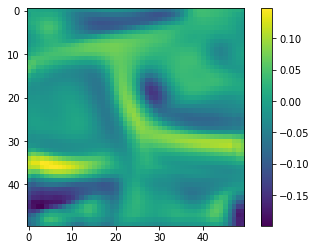

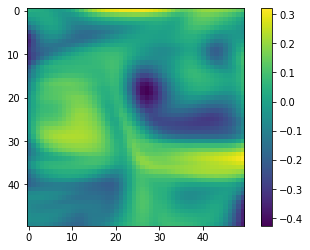

MSE normalisée=  tensor(0.0051)
correlation=  0.14897825587858177


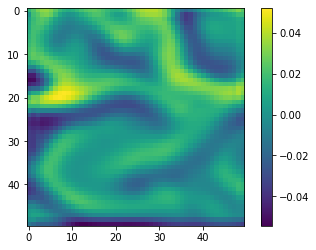

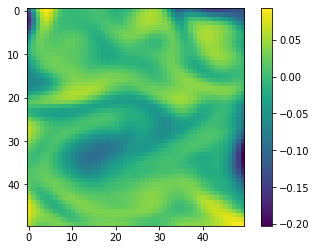

In [0]:
for j in range(0,100,10):
  loss_fn = nn.MSELoss()
  MSE=loss_fn(outputs[j].data,Y_test[j])
  print("MSE normalisée= ", (MSE.float()/(Y_test[j].max().float()-Y_test[j].min().float())))

  cor=np.corrcoef(Y_test[j].view(-1),outputs[j].data.view(-1))
  print("correlation= ", cor[0,1])
  plt.figure()
  plt.imshow(outputs[j].data)
  plt.colorbar()
  plt.show()

  plt.figure()
  plt.imshow(Y_test[j])
  plt.colorbar()
  plt.show()
  
  


In [0]:

MSE=loss_fn(outputs.data,Y_test[0:3000])
eff=1-MSE/Y_test[0:3000].var()
print("efficience: ", float(eff))


## Evaluation par le laplacien





In [0]:
from scipy.sparse import csgraph

output_laplacian= []
test_laplacian= []
for i in range(len(Y_test)):
  output_laplacian.append(csgraph.laplacian(outputs.data[i]))
  test_laplacian.append(csgraph.laplacian(Y_test[i]))
output_laplacian= torch.Tensor(output_laplacian)
test_laplacian= torch.Tensor(test_laplacian)


MSE=loss_fn(output_laplacian, test_laplacian)
eff=1-MSE/test_laplacian.var()
print("lapalacian_efficience: ", float(eff))

In [0]:
scipy.ndimage.filters.laplace(image)